In [1]:
#!pip install pandas
!pip install xlrd

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd

In [3]:
lsk = pd.read_excel('vr_report.xls')

В  общем суть такая. мы студентам давали делать презентации в VR  очках. кто-то делал 1 раз, кто-то 2 или 3. вопрос 1) есть ли корреляции чего-то с чем-то ( там количества слов-паразитов и качества контакта с аудиторией)  2) есть ли улучшение по тем, кто презентовал 2 и 3 раз по выделенным параметрам...

In [4]:
lsk.head()

,Фамилия,Имя,Отчество,Номер сессии,Дата,Длительность (минуты),Зрительный контакт,Потеря зрительного контакта (сек),Отсутствие зрительного контакта (раз),Взгляд на презентацию (раз),"Слова паразиты, общее количество","Слова паразиты, конкретные слова-паразиты и их количество","Грубые слова, общее количество",Распределение внимания,Внимание к посторонним объектам,Ссылка на аудиозапись выступления
0,Aysin,Kamil,A,98,22.11.23 17:05,3:52,90%,3,0,0,12,Well(1) So(5) Um(1) Uh(1) Really(2) Like(1) Ac...,0,Плохая,Избыточное,https://pubspeak-skoltech.modumlab.com/audio/9...
1,Aysin,Kamil,A,95,22.11.23 17:00,1:07,97%,1,0,0,0,NaN,0,Плохая,Оптимальное,https://pubspeak-skoltech.modumlab.com/audio/9...
2,Cherniaeva,Mariia,A,83,22.11.23 13:44,4:17,60%,19,7,1,12,Like(2) So(8) Uh(2),0,Плохая,Избыточное,https://pubspeak-skoltech.modumlab.com/audio/8...
3,Fedorenko,Alisa,A,93,22.11.23 16:58,1:11,94%,3,0,0,1,So(1),0,Плохая,Оптимальное,https://pubspeak-skoltech.modumlab.com/audio/9...
4,Hammoud,Mohammed,A,80,22.11.23 13:39,02:48:00,98%,1,0,0,5,So(2) Well(1) Like(1) Basically(1),0,Плохая,Оптимальное,https://pubspeak-skoltech.modumlab.com/audio/8...


In [5]:
lsk.columns

Index(['Фамилия', 'Имя', 'Отчество', 'Номер сессии', 'Дата',
       'Длительность (минуты)', 'Зрительный контакт',
       'Потеря зрительного контакта (сек)',
       'Отсутствие зрительного контакта (раз)', 'Взгляд на презентацию (раз)',
       'Слова паразиты, общее количество',
       'Слова паразиты, конкретные слова-паразиты и их количество',
       'Грубые слова, общее количество', 'Распределение внимания',
       'Внимание к посторонним объектам', 'Ссылка на аудиозапись выступления'],
      dtype='object')

In [6]:
cols = ['fam', 'name', 'otch', 'numsession', 'date',
       'dlitelnost', 'eye_contact',
       'time_losing_contact',
       'number_losing', 'num_preslook',
       'num_fillerwords',
       'garbage',
       'num_shitwords', 'distrib_attent',
       'pass_attent', 'garba2']
lsk.columns = cols

In [7]:
lsk.head()

,fam,name,otch,numsession,date,dlitelnost,eye_contact,time_losing_contact,number_losing,num_preslook,num_fillerwords,garbage,num_shitwords,distrib_attent,pass_attent,garba2
0,Aysin,Kamil,A,98,22.11.23 17:05,3:52,90%,3,0,0,12,Well(1) So(5) Um(1) Uh(1) Really(2) Like(1) Ac...,0,Плохая,Избыточное,https://pubspeak-skoltech.modumlab.com/audio/9...
1,Aysin,Kamil,A,95,22.11.23 17:00,1:07,97%,1,0,0,0,NaN,0,Плохая,Оптимальное,https://pubspeak-skoltech.modumlab.com/audio/9...
2,Cherniaeva,Mariia,A,83,22.11.23 13:44,4:17,60%,19,7,1,12,Like(2) So(8) Uh(2),0,Плохая,Избыточное,https://pubspeak-skoltech.modumlab.com/audio/8...
3,Fedorenko,Alisa,A,93,22.11.23 16:58,1:11,94%,3,0,0,1,So(1),0,Плохая,Оптимальное,https://pubspeak-skoltech.modumlab.com/audio/9...
4,Hammoud,Mohammed,A,80,22.11.23 13:39,02:48:00,98%,1,0,0,5,So(2) Well(1) Like(1) Basically(1),0,Плохая,Оптимальное,https://pubspeak-skoltech.modumlab.com/audio/8...


In [8]:
lsk.date = pd.to_datetime(lsk["date"], format="%d.%m.%y %H:%M")


In [9]:
lsk['eye_contact'] = lsk['eye_contact'].str.replace('%', '', regex=True)

In [10]:
lsk["eye_contact"] = lsk["eye_contact"].astype(int)

In [11]:
lsk = lsk[['fam', 'name', 'date',
       'dlitelnost', 'eye_contact',
       'time_losing_contact',
       'number_losing', 'num_preslook',
       'num_fillerwords',
       'num_shitwords', 'distrib_attent',
       'pass_attent' ]]

In [12]:
lsk.groupby(['distrib_attent']).count()

,fam,name,date,dlitelnost,eye_contact,time_losing_contact,number_losing,num_preslook,num_fillerwords,num_shitwords,pass_attent
distrib_attent,,,,,,,,,,,
Плохая,42,42,42,42,42,42,42,42,42,42,42
Средняя,4,4,4,4,4,4,4,4,4,4,4
Хорошая,1,1,1,1,1,1,1,1,1,1,1


In [13]:
def categ(item):
    if item=='Плохая':
        temp = 1
    elif item =='Средняя':
        temp = 2
    else:
        temp = 3
    return temp    

In [14]:
def categ2(item):
    if item=='Избыточное':
        temp = 0
    else:    
        temp = 1
    return temp   

In [15]:
lsk['distrib_attent'] = lsk['distrib_attent'].apply(categ)

In [16]:
lsk.groupby(['pass_attent']).count()
lsk['pass_attent'] = lsk['pass_attent'].apply(categ2)

In [17]:
df2 = lsk.sort_values(['fam', 'name', 'date'],
              ascending = [True, True, True])
first = df2.drop_duplicates(subset=['fam', 'name'], keep = 'first')
last = df2.drop_duplicates(subset=['fam', 'name'], keep = 'last')

In [18]:
df3 = pd.merge(first, last, on=['fam','name'], how = 'inner')


In [19]:
dff1 = df3[['date_x', 'dlitelnost_x', 'eye_contact_x',
       'time_losing_contact_x', 'number_losing_x', 'num_preslook_x',
       'num_fillerwords_x', 'num_shitwords_x', 'distrib_attent_x', 'pass_attent_x']]
dff2 = df3[['date_y', 'dlitelnost_y', 'eye_contact_y', 'time_losing_contact_y',
       'number_losing_y', 'num_preslook_y', 'num_fillerwords_y', 'num_shitwords_y',
       'distrib_attent_y', 'pass_attent_y']]
dff1.columns = [ 'date',
       'dlitelnost', 'eye_contact',
       'time_losing_contact',
       'number_losing', 'num_preslook',
       'num_fillerwords',
       'num_shitwords', 'distrib_attent',
       'pass_attent' ]
dff2.columns = [ 'date',
       'dlitelnost', 'eye_contact',
       'time_losing_contact',
       'number_losing', 'num_preslook',
       'num_fillerwords',
       'num_shitwords', 'distrib_attent',
       'pass_attent' ]

In [21]:
dff2.head()

,date,dlitelnost,eye_contact,time_losing_contact,number_losing,num_preslook,num_fillerwords,num_shitwords,distrib_attent,pass_attent
0,2023-11-22 17:05:00,3:52,90,3,0,0,12,0,1,0
1,2023-11-22 13:44:00,4:17,60,19,7,1,12,0,1,0
2,2023-11-22 16:58:00,1:11,94,3,0,0,1,0,1,1
3,2023-11-22 13:39:00,02:48:00,98,1,0,0,5,0,1,1
4,2023-11-22 17:31:00,7:01,52,29,9,9,27,0,1,0


In [22]:
import numpy as np
import pingouin as pg

Начинаем анализ

In [23]:
import scipy.stats as stats

In [24]:
res = stats.wilcoxon(dff1[['time_losing_contact']], dff2[['time_losing_contact']])
res

C:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


WilcoxonResult(statistic=array([5.]), pvalue=array([0.01252784]))

In [25]:
stats.wilcoxon(dff1[['eye_contact']], dff2[['eye_contact']])

C:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


WilcoxonResult(statistic=array([8.5]), pvalue=array([0.01668677]))

In [26]:
import seaborn as sns
import numpy as np  # для треугольной матрицы в хитмапе, чтобы красиво

In [27]:
sns.set_theme(style="whitegrid")

In [28]:
dff1.head()

,date,dlitelnost,eye_contact,time_losing_contact,number_losing,num_preslook,num_fillerwords,num_shitwords,distrib_attent,pass_attent
0,2023-11-22 17:00:00,1:07,97,1,0,0,0,0,1,1
1,2023-11-22 13:44:00,4:17,60,19,7,1,12,0,1,0
2,2023-11-22 16:58:00,1:11,94,3,0,0,1,0,1,1
3,2023-11-22 13:35:00,3:23,97,1,0,0,4,0,1,0
4,2023-11-22 17:31:00,7:01,52,29,9,9,27,0,1,0


In [29]:
dff1.columns

Index(['date', 'dlitelnost', 'eye_contact', 'time_losing_contact',
       'number_losing', 'num_preslook', 'num_fillerwords', 'num_shitwords',
       'distrib_attent', 'pass_attent'],
      dtype='object')

In [30]:
corr_matrix = dff1[['eye_contact', 'time_losing_contact',
       'number_losing', 'num_preslook', 'num_fillerwords']].corr(method = 'spearman')
corr_matrix2 = dff2[['eye_contact', 'time_losing_contact',
       'number_losing', 'num_preslook', 'num_fillerwords']].corr(method = 'spearman')

num1 = dff1[['eye_contact', 'time_losing_contact',
       'number_losing', 'num_preslook', 'num_fillerwords']]
num2 = dff2[['eye_contact', 'time_losing_contact',
       'number_losing', 'num_preslook', 'num_fillerwords']]

<Axes: >

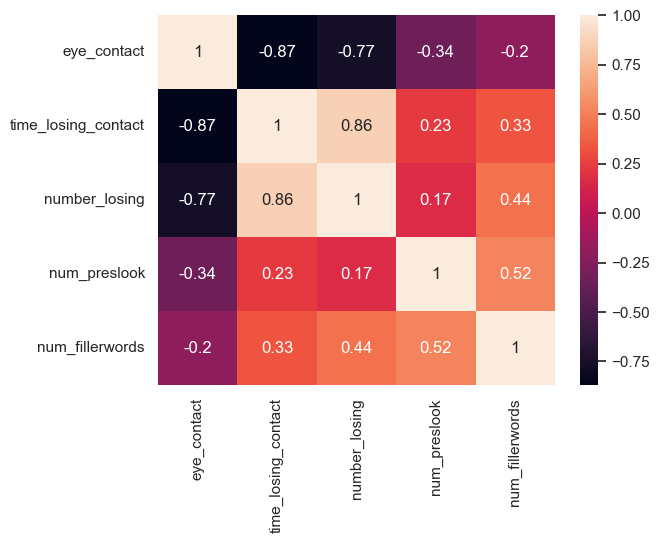

In [79]:
#sns.heatmap(corr_matrix, annot=True)
sns.heatmap(corr_matrix, annot=True)


In [32]:
x = dff1['eye_contact'].tolist()
y = dff2['eye_contact'].tolist()
pg.ttest(x,y)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.775824,56,two-sided,0.081195,"[-18.64, 1.12]",0.466354,0.98,0.415144


In [42]:
corrs2 = pg.pairwise_corr(num2, method='spearman').round(2)
corrs2[corrs2['p-unc']<0.05]

,X,Y,method,alternative,n,r,CI95%,p-unc,power
0,eye_contact,time_losing_contact,spearman,two-sided,29,-0.91,"[-0.96, -0.82]",0.00,1.00
1,eye_contact,number_losing,spearman,two-sided,29,-0.75,"[-0.88, -0.53]",0.00,1.00
2,eye_contact,num_preslook,spearman,two-sided,29,-0.58,"[-0.78, -0.26]",0.00,0.92
4,time_losing_contact,number_losing,spearman,two-sided,29,0.87,"[0.73, 0.94]",0.00,1.00
5,time_losing_contact,num_preslook,spearman,two-sided,29,0.48,"[0.13, 0.72]",0.01,0.77
6,time_losing_contact,num_fillerwords,spearman,two-sided,29,0.40,"[0.03, 0.67]",0.03,0.58
9,num_preslook,num_fillerwords,spearman,two-sided,29,0.42,"[0.07, 0.68]",0.02,0.64


In [86]:
corrs1.to_csv('corrtable1.tsv', sep = '\t', index = False)
corrs2.to_csv('corrtable2.tsv', sep = '\t', index = False)

In [40]:
corrs1 = pg.pairwise_corr(num1, method='spearman').round(2)
corrs1[corrs1['p-unc']<0.05]

,X,Y,method,alternative,n,r,CI95%,p-unc,power
0,eye_contact,time_losing_contact,spearman,two-sided,29,-0.87,"[-0.94, -0.74]",0.00,1.00
1,eye_contact,number_losing,spearman,two-sided,29,-0.77,"[-0.88, -0.56]",0.00,1.00
4,time_losing_contact,number_losing,spearman,two-sided,29,0.86,"[0.73, 0.93]",0.00,1.00
8,number_losing,num_fillerwords,spearman,two-sided,29,0.44,"[0.09, 0.7]",0.02,0.70
9,num_preslook,num_fillerwords,spearman,two-sided,29,0.52,"[0.19, 0.74]",0.00,0.85


In [84]:
rcorr1 = pg.rcorr(num1, method='spearman')
rcorr1.to_csv('spearman_firstpres.tsv', sep = '\t', index = False)
rcorr1

,eye_contact,time_losing_contact,number_losing,num_preslook,num_fillerwords
eye_contact,-,***,***,,
time_losing_contact,-0.868,-,***,,
number_losing,-0.766,0.865,-,,*
num_preslook,-0.339,0.23,0.165,-,**
num_fillerwords,-0.198,0.332,0.445,0.52,-


In [85]:
rcorr2 = pg.rcorr(num2, method='spearman')
rcorr2.to_csv('spearman_secondpres.tsv', sep = '\t', index = False)
rcorr2

,eye_contact,time_losing_contact,number_losing,num_preslook,num_fillerwords
eye_contact,-,***,***,**,
time_losing_contact,-0.911,-,***,**,*
number_losing,-0.749,0.867,-,,
num_preslook,-0.575,0.477,0.357,-,*
num_fillerwords,-0.304,0.395,0.366,0.422,-


In [48]:
x = dff1['eye_contact'].tolist()
y = dff2['eye_contact'].tolist()
pg.wilcoxon(x, y, alternative='two-sided')

C:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


,W-val,alternative,p-val,RBC,CLES
Wilcoxon,8.5,two-sided,0.018558,-0.782051,0.369203


In [52]:
x = dff1['time_losing_contact'].tolist()
y = dff2['time_losing_contact'].tolist()
pg.wilcoxon(x, y, alternative='two-sided')

C:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


,W-val,alternative,p-val,RBC,CLES
Wilcoxon,5.0,two-sided,0.014193,0.848485,0.63258


In [73]:
wilcox = pd.DataFrame()
for i in num1:
    #print(i)
    temp = stats.wilcoxon(num1[[i]], num2[[i]])
    tdict = {'feature':[str(i)], 'W-val': [str(*temp.statistic)], 'pvalue':[str(*temp.pvalue)]}
    tdf = pd.DataFrame(tdict)
    wilcox = pd.concat([wilcox, tdf]) 
    #temp2 = pg.wilcoxon(num1.i, num2.i, alternative='two-sided')
    print(str(i)+ ' W-val = '+ str(*temp.statistic) +','+ " pvalue =", str(*temp.pvalue))

eye_contact W-val = 8.5, pvalue = 0.01668677011401322
time_losing_contact W-val = 5.0, pvalue = 0.012527842133594475
number_losing W-val = 0.0, pvalue = 0.043114446783075355
num_preslook W-val = 4.5, pvalue = 0.20210204418937272
num_fillerwords W-val = 37.5, pvalue = 0.574934084570652


C:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
C:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
C:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
C:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
C:\ProgramData\anaconda3\Lib\sit

In [80]:
wilcox.to_csv('wilcox.tsv', index = False, sep = '\t')

In [87]:
wilcox

,feature,W-val,pvalue
0,eye_contact,8.5,0.01668677011401322
0,time_losing_contact,5.0,0.012527842133594475
0,number_losing,0.0,0.043114446783075355
0,num_preslook,4.5,0.20210204418937272
0,num_fillerwords,37.5,0.574934084570652


In [99]:
import matplotlib.pyplot as plt

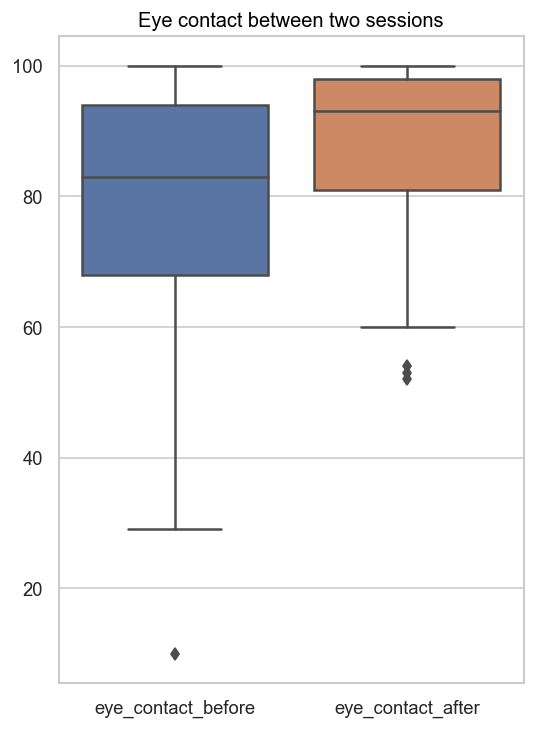

In [104]:
plt.figure(figsize=(5,7), dpi = 120)
plt.minorticks_off()
x = num1['eye_contact']
y = num2['eye_contact']
df = pd.concat([x, y], axis=1)
df.columns = ['eye_contact_before', 'eye_contact_after']
sns.boxplot(df)
# labels text
plt.title('Eye contact between two sessions', fontsize=12, fontweight=0, color='black')
#ax.set_xlabel('Sessions')
#ax.set_ylabel('Eye contact')
plt.show()

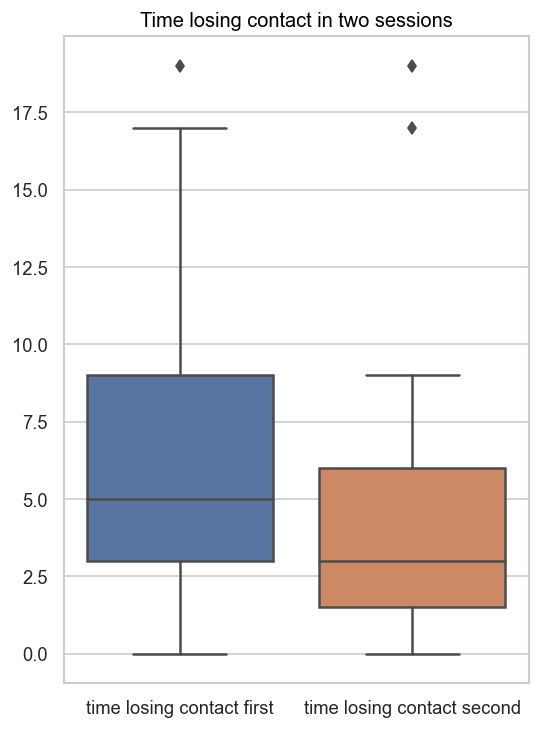

In [112]:
plt.figure(figsize=(5,7), dpi = 120)
plt.minorticks_off()
x = num1[num1['time_losing_contact']<20].time_losing_contact
y = num2[num2['time_losing_contact']<20].time_losing_contact
df = pd.concat([x, y], axis=1)
df.columns = ['time losing contact first', 'time losing contact second']
sns.boxplot(df)
# labels text
plt.title('Time losing contact in two sessions', fontsize=12, fontweight=0, color='black')
#ax.set_xlabel('Sessions')
#ax.set_ylabel('Eye contact')
plt.show()

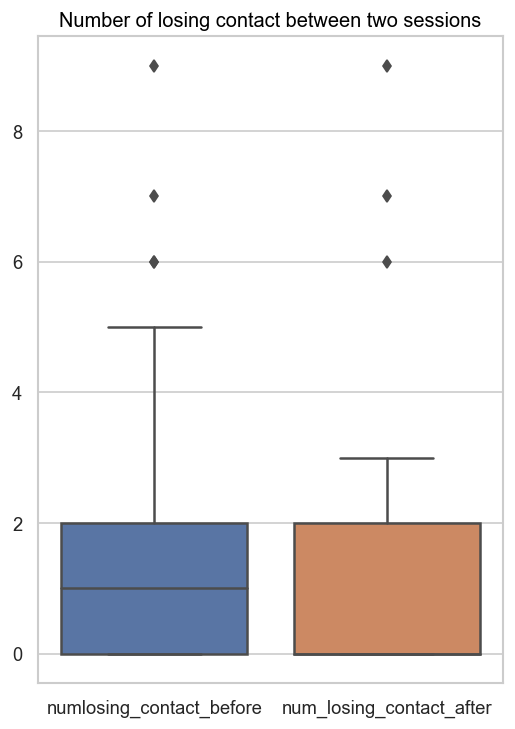

In [113]:
plt.figure(figsize=(5,7), dpi = 120)
plt.minorticks_off()
x = num1['number_losing']
y = num2['number_losing']
df = pd.concat([x, y], axis=1)
df.columns = ['numlosing_contact_before', 'num_losing_contact_after']
sns.boxplot(df)
# labels text
plt.title('Number of losing contact between two sessions', fontsize=12, fontweight=0, color='black')
#ax.set_xlabel('Sessions')
#ax.set_ylabel('Eye contact')
plt.show()